In [ ]:
# Functions

In [1]:
def get_words(line):
    r'''
    This function takes a text and returns
    a list of lowercase words. It removes all digits
    and strips punctuation characters from the words.
    
    >>> get_words('Here are severall1000 words!\n Blub')
    ['here', 'are', 'severall', 'words', 'blub']
    
    >>> get_words('"Where are they? 10 \t 1000!?"')
    ['where', 'are', 'they']
    
    >>> get_words('\t\t\t\r\r\r\n<ada> hallo12 \r\t\t\t\t')
    ['ada', 'hallo']
    
    '''
    import re
    line = re.sub('\s*[\r\t]+','',line)
    line = line.lower()
    line = re.sub('[^+#a-z\s\'-]+','',line)

    
    words = line.split()
    return words

if __name__ == '__main__':
    import doctest
    doctest.testmod()

# Data Import

In [2]:
import pandas as pd
import json
from collections import Counter

# Columns which shall be kept from the downloaded data
columns = ['job_title', 'employer', 'origin', 'location',
           'salary', 'job_type', 'job_description',]

# Keywords to check for in the job description. Each keyword 
# gets its own column with True and False values.
languages = ['python', 'java', 'perl', 'r', 'fortran', 'sql',
             'html', 'css', 'javascript', 'c', 'c++', 'c#',
              'BEL', 'git', 'github']

informatician = ['bioinformatician', 'bioinformatics']

#keywords for later duplicate deleting
duplicate_pattern = ['researcher', 'details', 'skills', 'successful',
                     'program', 'expected', 'strong']

#List of programming related words, later used to check if job offer
#is programming related / involves programming
prog_related = ['programming', 'programing', 'code', 'coding', 
                'computational', 'programming-language', 'script',
                'scripting', 'script-language', 'informatics'
               ]

# load nature jobs
with open('ls_jobs/nature_jobs.json', 'r') as myfile:
    nature_jobs = json.load(myfile)

# load science jobs
with open('ls_jobs/science_jobs.json', 'r') as myfile:
    science_jobs = json.load(myfile)

# Count words and add an orign entry to the science data
for entry in science_jobs:
    entry['job_description_words'] = Counter(get_words(entry['job_description']))
    entry['origin'] = 'science'

# Count words and add an orign entry to the nature data
for entry in nature_jobs:
    entry['job_description_words'] = Counter(get_words(entry['job_description']))
    entry['origin'] = 'nature'

# Combine the job data from science and nature
job_data = science_jobs+nature_jobs

# Add the entries for the keywords
for entry in job_data:
    for keyword in (languages + informatician + duplicate_pattern):
        if keyword in entry['job_description_words'].keys():
            entry[keyword] = entry['job_description_words'][keyword]
        else:
            entry[keyword] = 0
    #check if job offer is programmin related, if so set to True
    for prog_word in (prog_related + languages + informatician):
        if prog_word in entry['job_description_words'] or 'Bioinformatic' in entry['job_type']:
            entry['programming_related'] = True
            break
        else:
            entry['programming_related'] = False

# Read the data into a dataframe and select the specified columns
df = pd.DataFrame(job_data)
#only keep specific columns (entries of the added lists)
df = df[(columns + ['programming_related'] + languages +
        duplicate_pattern + informatician)]

#df['successful'][:10]
df[df['job_type'].str.contains('Bioinformatic')]



df['job_type'][df['origin']=='science']

0                             Other
1                             Other
2             Psychiatry/Psychology
3                Postdoc Fellowship
4                         Full Time
5                             Other
6                    Science Policy
7                             Other
8                             Other
9                     Public Health
10             Agricultural Science
11                            Other
12                            Other
13                       Healthcare
14                       Healthcare
15                       Healthcare
16                       Healthcare
17                       Healthcare
18               Research Scientist
19                  Staff Scientist
20               Postdoc Fellowship
21                  Staff Scientist
22                  Staff Scientist
23                          Postdoc
24               Research Scientist
25                  PhD Studentship
26                            Other
27      History & Philosophy

# Inspect data

In [5]:
#get and print number of entries in dataset pre duplicate deletion
print('Dataset before duplicate reduction')
print('Total Number of job offers/entries:')
entries_pre_del = len(df)
print(entries_pre_del)
print('Number of job offers/entries from Science:')
sci_entries_pre_del = len(df[df['origin']=='science'])
print(sci_entries_pre_del)
print('Number of job offers/entries from Nature:')
nat_entries_pre_del = len(df[df['origin']=='nature'])
print(nat_entries_pre_del)

Dataset before duplicate reduction
Total Number of job offers/entries:
3175
Number of job offers/entries from Science:
1184
Number of job offers/entries from Nature:
1991


## Remove duplicates

Here we remove duplicates by two different approaches. First we remove all rows from our pandas DataFrame which are not unique. A row is unique if there is no other row which has the same values in every column. 

In [6]:
#remove completly identical entries
df[df.duplicated()==True]
df = df[df.duplicated()==False]

In [7]:
#delete entries which seem to be duplicates 
#according to the word occurences
df = df[df.duplicated(subset=['job_title', 'employer',
                           'researcher', 'details',
                           'skills', 'successful',
                           'program', 'expected',
                           'strong'])==False]

In [8]:
#get and print number of entries in dataset post duplicate deletion
print('Dataset after duplicate reduction')
print('Total Number of job offers/entries:')
print(len(df))
print('Number of job offers/entries from Science:')
print(len(df[df['origin']=='science']))
print('Number of job offers/entries from Nature:')
print(len(df[df['origin']=='nature']))

Dataset after duplicate reduction
Total Number of job offers/entries:
3094
Number of job offers/entries from Science:
1160
Number of job offers/entries from Nature:
1934


In [82]:

jtype_binf = len(df[(df['job_type'].str.contains('Bioinformatic')) |
                (df['job_type'].str.contains('bioinformatic'))])

print('Number of jobs associated with bioinformatics:')
print(jtype_binf)

print(len(df[(df['bioinformatics']>0) |
             (df['bioinformatician']>0) |
             (df['job_type'].str.contains('Bioinformatic'))]))

Number of jobs associated with bioinformatics:
25
392


In [ ]:
x = df[(df['bioinformatics']>0) |
       (df['bioinformatician']>0)]

print(len(x[(x['job_type'].str.contains('Bioinformatic'))]))

# Question 1: Which programming languages are mentioned most often in job ads for bioinformaticians?

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

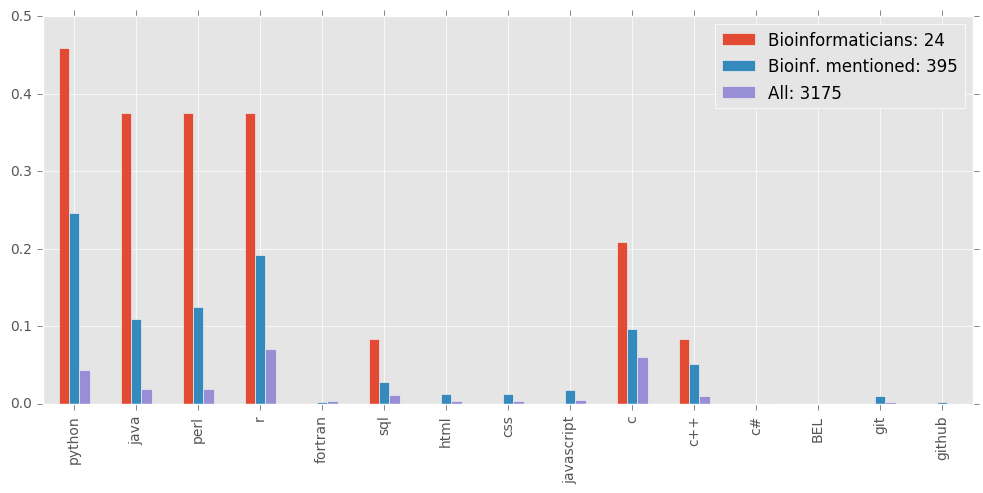

In [31]:
plot_data = df[languages]

bioinf = plot_data.loc[(df['job_type'].str.contains('Bioinformatic')) |
                                 (df['job_type'].str.contains('Chemoinformatic'))]


mentioned_bioinf = plot_data[(df['bioinformatics']>0) |
                             (df['bioinformatician']>0) |
                             (df['job_type'].str.contains('Bioinformatic')) |
                             (df['job_type'].str.contains('Chemoinformatic'))]

all_jobs = plot_data

plotframe = pd.concat([bioinf.sum()/len(bioinf),
                       mentioned_bioinf.sum()/len(mentioned_bioinf),
                       all_jobs.sum()/len(all_jobs)], axis=1)

plotframe.set_index(plot_data.sum().index)
plotframe = plotframe.rename(index = str, columns={0:'Bioinformaticians: '+str(len(bioinf)),
                                                   1:'Bioinf. mentioned: '+str(len(mentioned_bioinf)),
                                                   2:'All: '+str(len(all_jobs))})
ax = plotframe.plot(kind='bar', figsize=(12, 5))

# Programming in Biology

## How many job offers are programming related?

In [64]:
#subsample programming related column
data_prj = df['programming_related']

#get programming related jobs and not programming related jobs
prog_rel_jobs = sum(data_prj)/len(data_prj)
no_prog_rel_jobs = 1 - prog_rel_jobs

"""
#code for plotting
#plotting doesn't really make sense. no information gain and not 
#easier to explain stuff with plot. hard numbers say enough
ax = plt.subplot()
ax.set_xticks = [0, 0.5, 1, 1.5]
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_ylim([0,1])
ax.set_xticklabels(['', 'programming_related', '' ,'not_related'])
ax.bar(0.5, prog_rel_jobs, width = 0.5)
ax.bar(1, no_prog_rel_jobs, width = 0.5)

plt.show()
"""
print(prog_rel_jobs)
print(no_prog_rel_jobs)

0.316535433071
0.683464566929


# Which languages are mentioned together

CHECK FOR CORRELATION BETWEN LANGUAGE OCCURANCES

In [72]:
from scipy.stats.stats import pearsonr
#man muss sich nochmal angucken,
#was genau die pearson cor macht
#population eingrenzen

pearsonr(mentioned_bioinf['r'], mentioned_bioinf['python'])

(0.60855203176932593, 2.2042929367695786e-41)

In [78]:
#irgendwas, das olivier gemacht hat
print(len(df[(df['java'] > 0) & (df['python'] > 0)]),
len(df[(df['java'] > 0) & (df['perl'] > 0)]),
len(df[(df['r'] > 0) & (df['python'] > 0)]),
len(df[(df['perl'] > 0) & (df['python'] > 0)]),
len(df[(df['perl'] > 0) & (df['r'] > 0)]))


44 29 69 51 36
